In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
n = 2  # number of items to be added to the Bloom filter; number of parties in transaction?
p = 0.00001  # desired false positive probability

m = np.ceil((n * np.log(p)) / np.log(1 / np.power(2, np.log(2))))
k = np.round((m / n) * np.log(2))

print('m:', m)
print('k:', k)

m: 48.0
k: 17.0


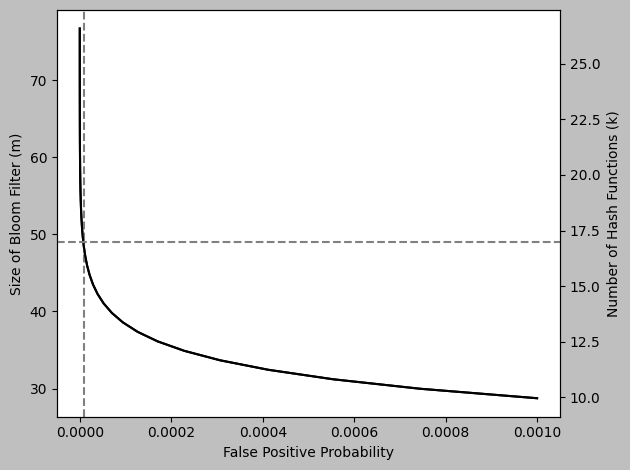

In [14]:
n = 2

# false positive probabilities to consider
p_values = np.logspace(-8, -3, 40)  # a sequence of 400 numbers; starts at 0.00000001 and ends at 0.001 

# calculate m and k for each p
m_values = (n * np.log(p_values)) / np.log(1 / np.power(2, np.log(2)))
k_values = (m_values / n) * np.log(2)

# plot m and k vs p
fig, ax1 = plt.subplots()

color = 'black'
ax1.set_xlabel('False Positive Probability')
ax1.set_ylabel('Size of Bloom Filter (m)', color=color)
ax1.plot(p_values, m_values, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'black'
ax2.set_ylabel('Number of Hash Functions (k)', color=color)
ax2.plot(p_values, k_values, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# draw a horizontal dashed line at k = 17
ax2.axhline(y=17, color='grey', linestyle='--')

# draw a vertical dashed line at p = 0.00001
ax1.axvline(x=0.00001, color='grey', linestyle='--')

fig.tight_layout()

# switch to grayscale
plt.style.use('grayscale')
plt.savefig('high_res_plot1.png', dpi=2400)

plt.show()



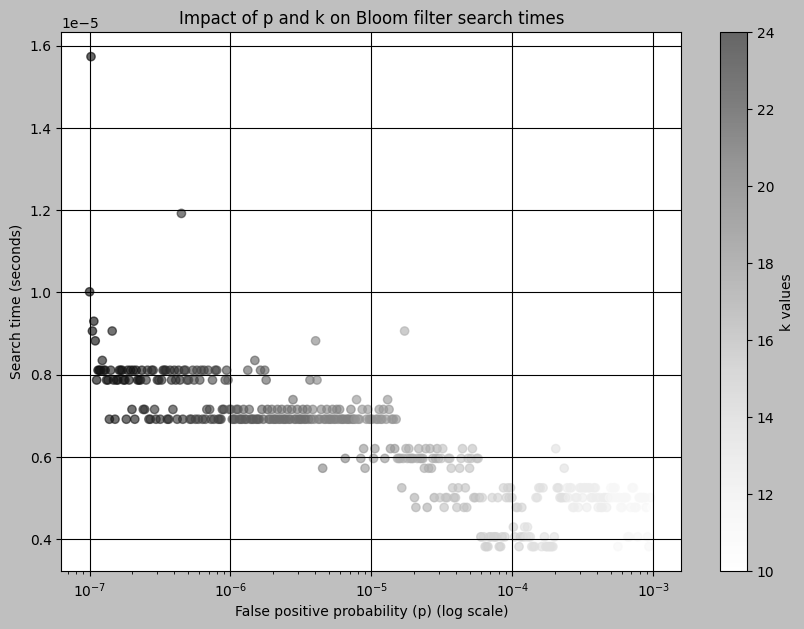

In [28]:
import time
import numpy as np
import matplotlib.pyplot as plt
from pybloom_live import BloomFilter

# list of items to insert into the Bloom filter
items = ['t1', 't2']

n = 2  # number of items to be added to the Bloom filter; number of parties in transaction?
p_values = np.logspace(-7, -3, 400)

m_values = np.ceil((n * np.log(p_values)) / np.log(1 / np.power(2, np.log(2))))

search_times = []  # list to store all search times
k_values = []  # list to store all k values

for m, p in zip(m_values, p_values):
    # create a Bloom filter with the specified capacity and error rate
    bloom_filter = BloomFilter(capacity=int(m), error_rate=p)

    # add items to the Bloom filter
    for item in items:
        bloom_filter.add(item)

    # time the search for an item
    start_time = time.time()
    for item in items:
        _ = item in bloom_filter
    search_time = time.time() - start_time

    search_times.append(search_time)
    k_values.append(bloom_filter.num_slices)

# create scatter plot
plt.figure(figsize=(10,7))
plt.scatter(p_values, search_times, c=k_values, cmap='Greys', alpha=0.6)
plt.xscale('log')
plt.colorbar(label='k values', cmap='Greys')
plt.xlabel('False positive probability (p) (log scale)')
plt.ylabel('Search time (seconds)')
plt.title('Impact of p and k on Bloom filter search times')
plt.grid(True)
plt.savefig('high_res_plot.png', dpi=1200)
plt.show()


In [39]:
import time
import numpy as np
import matplotlib.pyplot as plt
from pybloom_live import BloomFilter

# list of items to insert into the Bloom filter
items = ['t1', 't2']

n = 2  # number of items to be added to the Bloom filter; number of parties in transaction?
p_values = np.array([0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001])

m_values = np.ceil((n * np.log(p_values)) / np.log(1 / np.power(2, np.log(2))))

search_times = []  # list to store all search times
k_values = []  # list to store all k values

for m, p in zip(m_values, p_values):
    # create a Bloom filter with the specified capacity and error rate
    bloom_filter = BloomFilter(capacity=int(m), error_rate=p)

    # add items to the Bloom filter
    for item in items:
        bloom_filter.add(item)

    # time the search for an item
    start_time = time.time()
    for item in items:
        _ = item in bloom_filter
    search_time = time.time() - start_time

    search_times.append(search_time)
    k_values.append(bloom_filter.num_slices)

print(search_times)
print(m_values)
print(k_values)


[9.059906005859375e-06, 6.9141387939453125e-06, 6.9141387939453125e-06, 7.152557373046875e-06, 4.76837158203125e-06, 4.0531158447265625e-06]
[77. 68. 58. 48. 39. 29.]
[27, 24, 20, 17, 14, 10]


In [98]:
import time
import numpy as np
import matplotlib.pyplot as plt
from pybloom_live import BloomFilter

# list of items to insert into the Bloom filter
items = ['t1', 't2']

n = 2  # number of items to be added to the Bloom filter; number of parties in transaction?
p_values = np.array([0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001])

m_values_list = np.ceil((n * np.log(p_values)) / np.log(1 / np.power(2, np.log(2))))

# lists to store results from each iteration
all_total_times = []
all_m_values = []
all_k_values = []

for _ in range(40):  # run the experiment 10 times
    total_times = []  # list to store all total times (insertion + search)
    k_values = []  # list to store all k values

    for m, p in zip(m_values_list, p_values):
        # create a Bloom filter with the specified capacity and error rate
        bloom_filter = BloomFilter(capacity=int(m), error_rate=p)

        # time the insertion of items and add to the Bloom filter
        start_time = time.time()
        for item in items:
            bloom_filter.add(item)
        insertion_time = time.time() - start_time

        # time the search for an item
        start_time = time.time()
        for item in items:
            _ = item in bloom_filter
        search_time = time.time() - start_time

        total_times.append(insertion_time + search_time)
        k_values.append(bloom_filter.num_slices)
    
    all_total_times.append(total_times)
    all_m_values.append(m_values_list)
    all_k_values.append(k_values)

# print out the results
for i in range(40):
    print(all_total_times[i],';')


[2.288818359375e-05, 1.6927719116210938e-05, 1.3113021850585938e-05, 1.2159347534179688e-05, 1.0967254638671875e-05, 8.821487426757812e-06] ;
[1.5974044799804688e-05, 1.4066696166992188e-05, 1.2874603271484375e-05, 1.2159347534179688e-05, 1.0967254638671875e-05, 7.867813110351562e-06] ;
[1.5735626220703125e-05, 1.52587890625e-05, 1.3113021850585938e-05, 1.1205673217773438e-05, 1.0013580322265625e-05, 9.059906005859375e-06] ;
[1.4781951904296875e-05, 1.4066696166992188e-05, 1.3113021850585938e-05, 1.1920928955078125e-05, 1.0251998901367188e-05, 8.106231689453125e-06] ;
[1.5974044799804688e-05, 1.4066696166992188e-05, 1.2874603271484375e-05, 1.1920928955078125e-05, 1.0013580322265625e-05, 7.867813110351562e-06] ;
[1.621246337890625e-05, 1.4066696166992188e-05, 1.3113021850585938e-05, 1.1920928955078125e-05, 1.0013580322265625e-05, 6.9141387939453125e-06] ;
[1.5974044799804688e-05, 1.3828277587890625e-05, 1.3113021850585938e-05, 1.1920928955078125e-05, 1.0013580322265625e-05, 7.8678131103

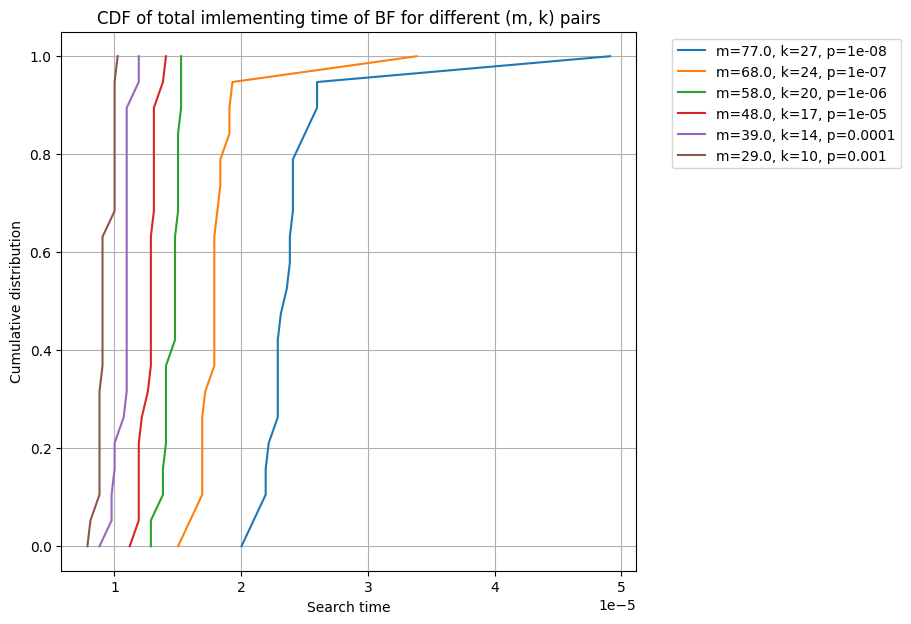

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# your data
m_values = np.array([77., 68., 58., 48., 39., 29.])
k_values = np.array([27, 24, 20, 17, 14, 10])
p_values = np.array([0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001])
search_times = np.array([
            [2.2172927856445312e-05, 1.9073486328125e-05, 1.4066696166992188e-05, 1.1920928955078125e-05, 9.775161743164062e-06, 9.059906005859375e-06],
            [2.002716064453125e-05, 1.5020370483398438e-05, 1.2874603271484375e-05, 1.1205673217773438e-05, 8.821487426757812e-06, 8.106231689453125e-06],
            [2.288818359375e-05, 1.7881393432617188e-05, 1.52587890625e-05, 1.3828277587890625e-05, 1.0967254638671875e-05, 9.059906005859375e-06],
            [2.288818359375e-05, 1.9311904907226562e-05, 1.52587890625e-05, 1.2159347534179688e-05, 1.0967254638671875e-05, 9.059906005859375e-06],
            [4.9114227294921875e-05, 1.9073486328125e-05, 1.4781951904296875e-05, 1.2874603271484375e-05, 1.0967254638671875e-05, 1.0251998901367188e-05],
            [2.09808349609375e-05, 1.71661376953125e-05, 1.2874603271484375e-05, 1.1920928955078125e-05, 1.0013580322265625e-05, 7.867813110351562e-06],
            [2.193450927734375e-05, 1.5974044799804688e-05, 1.4066696166992188e-05, 1.1920928955078125e-05, 1.0013580322265625e-05, 9.059906005859375e-06],
            [2.3126602172851562e-05, 1.7881393432617188e-05, 1.4781951904296875e-05, 1.3113021850585938e-05, 1.0967254638671875e-05, 9.059906005859375e-06],
            [2.288818359375e-05, 1.8358230590820312e-05, 1.4066696166992188e-05, 1.3113021850585938e-05, 1.0967254638671875e-05, 9.059906005859375e-06],
            [2.5033950805664062e-05, 1.811981201171875e-05, 1.4781951904296875e-05, 1.2874603271484375e-05, 1.0967254638671875e-05, 8.821487426757812e-06],
            [2.384185791015625e-05, 1.7881393432617188e-05, 1.5020370483398438e-05, 1.2874603271484375e-05, 1.0728836059570312e-05, 1.0013580322265625e-05],
            [2.193450927734375e-05, 3.3855438232421875e-05, 1.4066696166992188e-05, 1.1920928955078125e-05, 9.775161743164062e-06, 8.821487426757812e-06],
            [2.5987625122070312e-05, 1.7881393432617188e-05, 1.4781951904296875e-05, 1.2874603271484375e-05, 1.0967254638671875e-05, 1.0013580322265625e-05],
            [2.5987625122070312e-05, 1.7881393432617188e-05, 1.4781951904296875e-05, 1.2874603271484375e-05, 1.0967254638671875e-05, 1.0013580322265625e-05],
            [2.4080276489257812e-05, 1.8358230590820312e-05, 1.5020370483398438e-05, 1.2636184692382812e-05, 1.1920928955078125e-05, 8.821487426757812e-06],
            [2.3603439331054688e-05, 1.6927719116210938e-05, 1.52587890625e-05, 1.2874603271484375e-05, 1.0967254638671875e-05, 8.821487426757812e-06],
            [2.4080276489257812e-05, 1.7881393432617188e-05, 1.5020370483398438e-05, 1.3113021850585938e-05, 1.1920928955078125e-05, 8.821487426757812e-06],
            [2.4080276489257812e-05, 1.6927719116210938e-05, 1.5020370483398438e-05, 1.4066696166992188e-05, 1.0967254638671875e-05, 1.0013580322265625e-05],
            [2.384185791015625e-05, 1.6927719116210938e-05, 1.3828277587890625e-05, 1.3113021850585938e-05, 1.0967254638671875e-05, 1.0013580322265625e-05],
            [2.288818359375e-05, 1.6927719116210938e-05, 1.3828277587890625e-05, 1.3113021850585938e-05, 1.0967254638671875e-05, 1.0013580322265625e-05],
    
])

# create a new figure
plt.figure(figsize=(10, 7))

# plot CDF for each pair of (m, k) values
for i in range(len(m_values)):
    sorted_times = np.sort(search_times[:, i])
    yvals = np.arange(len(sorted_times)) / float(len(sorted_times)-1)
    plt.plot(sorted_times, yvals, label=f'm={m_values[i]}, k={k_values[i]}, p={p_values[i]}')

# add legend, labels and title
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1)) 
plt.xlabel('Search time')
plt.ylabel('Cumulative distribution')
plt.title('CDF of total imlementing time of BF for different (m, k) pairs')
plt.grid(True)

# ensure adequate spacing for the legend
plt.subplots_adjust(right=0.7)

# show the plot
plt.show()

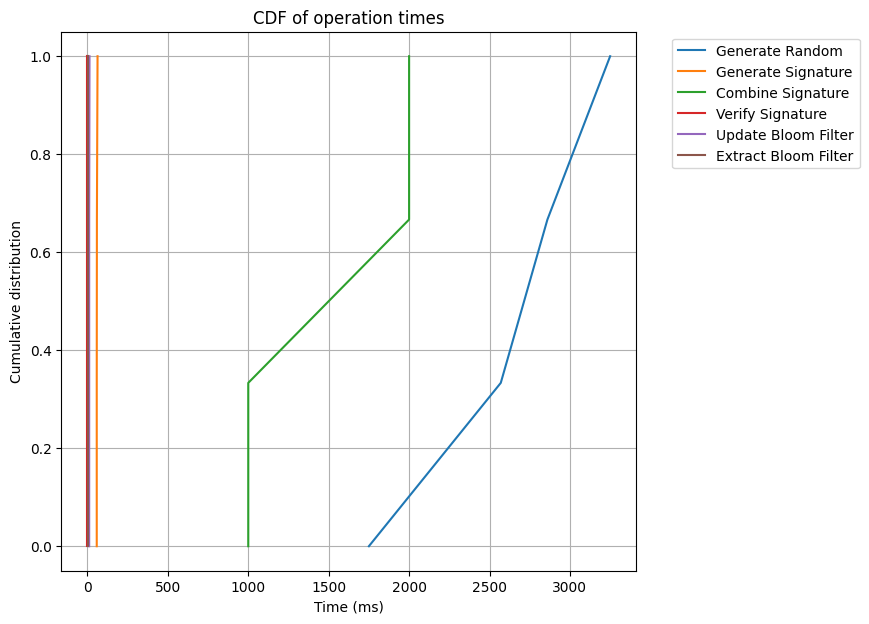

In [69]:
import numpy as np
import matplotlib.pyplot as plt


generateRandom_times = np.array([3250, 1750, 2570, 2860])  # milliseconds
generateSig_times = np.array([58, 63, 58, 59])
combineSig_times = np.array([1000, 2000, 2000, 1000])  #  milliseconds
verifySig_times = np.array([0, 0, 0, 0])  # In milliseconds
updateBloomFilter_times = np.array([11, 11, 13, 11])
extractBloomFilter_times = np.array([2, 2, 2, 2])

times_data = {
    'Generate Random': generateRandom_times,
    'Generate Signature': generateSig_times,
    'Combine Signature': combineSig_times,
    'Verify Signature': verifySig_times,
    'Update Bloom Filter': updateBloomFilter_times,
    'Extract Bloom Filter': extractBloomFilter_times
}


plt.figure(figsize=(10, 7))

# Calculate and plot the CDF for each operation
for operation, times in times_data.items():
    sorted_times = np.sort(times)
    yvals = np.arange(len(sorted_times)) / float(len(sorted_times)-1)
    plt.plot(sorted_times, yvals, label=operation)


plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1)) 
plt.xlabel('Time (ms)')
plt.ylabel('Cumulative distribution')
plt.title('CDF of operation times')
plt.grid(True)
plt.subplots_adjust(right=0.7)


plt.show()


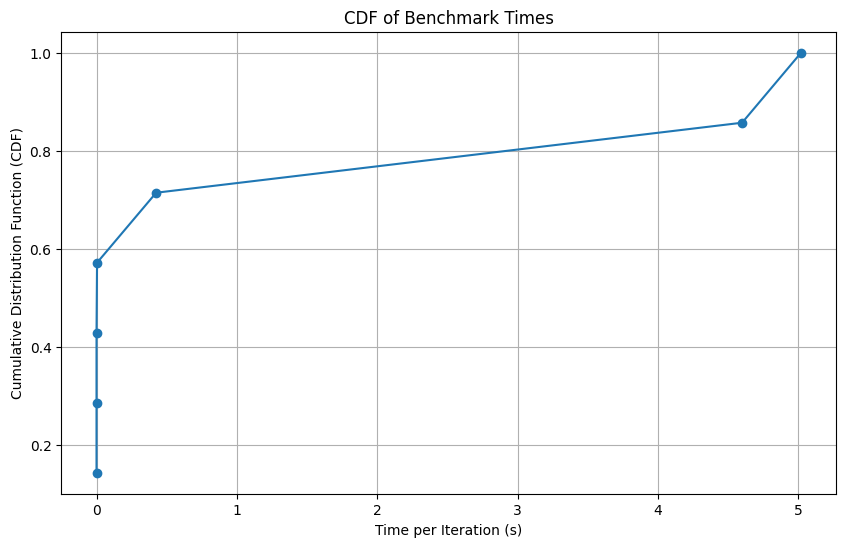

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Creating DataFrame from the given table
data = {
    'Benchmark': [
        'Key Shares Generation', 'Signature Shares Generation', 
        'Signature Shares Combination', 'Signature Verification', 
        'Bloom Filter Updating', 'Bloom Filter Extraction', 'Total time'
    ], 
    'Time': [46.0, 4.25, 0.038, 0.001, 0.010 * 1e-3, 0.001 * 1e-3, 50.2],  # Converted ms to s
    'Iterations': [10, 10, 10, 10, 10, 10, 10]
}

df = pd.DataFrame(data)

# Calculating time per iteration
df['Time per Iteration'] = df['Time'] / df['Iterations']

# Sorting values by time per iteration
df = df.sort_values(by='Time per Iteration')

# Calculating cumulative sum of iterations
df['Cumulative Iterations'] = df['Iterations'].cumsum()

# Normalizing cumulative sum to get CDF
df['CDF'] = df['Cumulative Iterations'] / df['Iterations'].sum()

# Plotting CDF
plt.figure(figsize=(10, 6))
plt.plot(df['Time per Iteration'], df['CDF'], marker='o')
plt.grid()
plt.xlabel('Time per Iteration (s)')
plt.ylabel('Cumulative Distribution Function (CDF)')
plt.title('CDF of Benchmark Times')
plt.show()
